In [1]:
from google.colab import drive
drive.mount("/gdrive")
import sys
sys.path.append("/gdrive/MyDrive/Colab Notebooks/Parvin/datasets/")

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
df = pd.read_excel("/gdrive/MyDrive/Colab Notebooks/Parvin/datasets/HighwayDataSet.xlsx")
df.describe()
# Looks like some features have noise data (RxSpeed[m/s], TxSpeed[m/s], distance[m], ...)

,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],SNR[dB],Pathloss[dB],Frequency[Ghz],distance[m],TxSpeed[m/s],RxSpeed[m/s]
count,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00,64000.00
mean,300.00,797.58,300.00,388.79,26.23,113.93,32.22,408.79,271.18,135.59
std,0.00,449.05,0.00,224.53,11.01,7.60,1.03,224.53,8568.01,4283.99
min,300.00,20.00,300.00,0.00,-15.76,88.08,30.40,20.00,136.80,69.84
25%,300.00,408.79,300.00,194.40,17.80,110.14,31.44,214.40,140.04,69.84
50%,300.00,797.58,300.00,388.79,26.44,115.86,32.23,408.79,140.04,69.98
75%,300.00,1186.38,300.00,583.19,33.26,119.71,32.98,603.19,140.40,70.20
max,300.00,1575.17,300.00,777.58,56.81,126.96,33.89,797.59,559861.20,279929.88


In [5]:
df.describe().to_csv("/gdrive/MyDrive/Colab Notebooks/Parvin/data_frame.csv")

In [6]:
df.rename(columns = {"RxSpeed[m/s]": "RxSpeed[km/h]", "TxSpeed[m/s]": "TxSpeed[km/h]"}, inplace = True)
df

,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],ChannelState,SNR[dB],Pathloss[dB],Frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h]
0,300,20.00,300,0.00,LOS,56.30,88.08,30.40,20.00,140.00,70.00
1,300,20.39,300,0.19,LOS,56.29,88.16,30.40,20.19,140.00,70.00
2,300,20.78,300,0.39,LOS,56.32,88.25,30.40,20.39,140.00,70.00
3,300,21.17,300,0.58,LOS,56.06,88.33,30.40,20.58,140.00,70.00
4,300,21.56,300,0.78,LOS,56.06,88.41,30.40,20.78,139.97,70.00
...,...,...,...,...,...,...,...,...,...,...,...
63995,300,1573.61,300,776.81,LOS,23.82,121.03,33.89,796.80,140.40,69.84
63996,300,1574.00,300,777.00,LOS,22.71,121.03,33.89,797.00,140.40,69.84
63997,300,1574.39,300,777.19,LOS,23.21,121.03,33.89,797.20,140.40,70.20
63998,300,1574.78,300,777.39,LOS,23.18,121.03,33.89,797.39,140.40,69.84


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


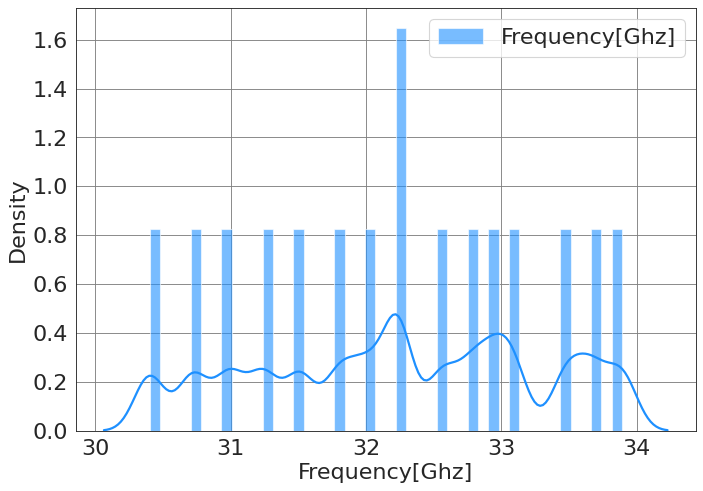

In [7]:
from seaborn.axisgrid import Grid
import seaborn as sns
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df["Frequency[Ghz]"], color="dodgerblue", label="Frequency[Ghz]", **kwargs)
plt.grid(color="gray")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


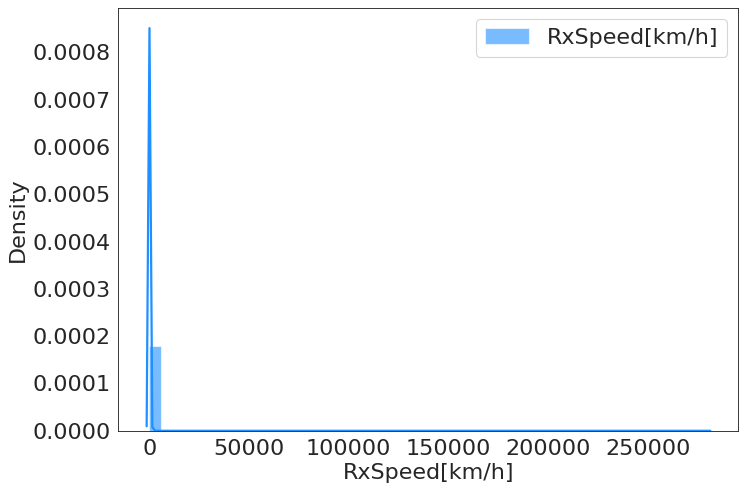

In [8]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df["RxSpeed[km/h]"], color="dodgerblue", label="RxSpeed[km/h]", **kwargs)
plt.legend()

In [9]:
df[df["RxSpeed[km/h]"] < 200000].count()

TxPosX[m]         63985
TxPosY[m]         63985
RxPosX[m]         63985
RxPosY[m]         63985
ChannelState      63985
SNR[dB]           63985
Pathloss[dB]      63985
Frequency[Ghz]    63985
distance[m]       63985
TxSpeed[km/h]     63985
RxSpeed[km/h]     63985
dtype: int64

In [10]:
df.drop(df[df["RxSpeed[km/h]"] > 110000].index, axis = 0, inplace = True)
df.describe()

,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],SNR[dB],Pathloss[dB],Frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h]
count,63985.00,63985.00,63985.00,63985.00,63985.00,63985.00,63985.00,63985.00,63985.00,63985.00
mean,300.00,797.40,300.00,388.70,26.23,113.93,32.22,408.70,140.00,70.00
std,0.00,448.95,0.00,224.47,11.01,7.60,1.03,224.47,0.69,0.17
min,300.00,20.00,300.00,0.00,-15.76,88.08,30.40,20.00,136.80,69.84
25%,300.00,408.50,300.00,194.25,17.80,110.14,31.51,214.25,140.04,69.84
50%,300.00,797.39,300.00,388.69,26.45,115.86,32.23,408.69,140.04,69.98
75%,300.00,1186.28,300.00,583.14,33.27,119.71,33.09,603.14,140.40,70.20
max,300.00,1575.17,300.00,777.58,56.81,126.96,33.89,797.59,140.40,70.20


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


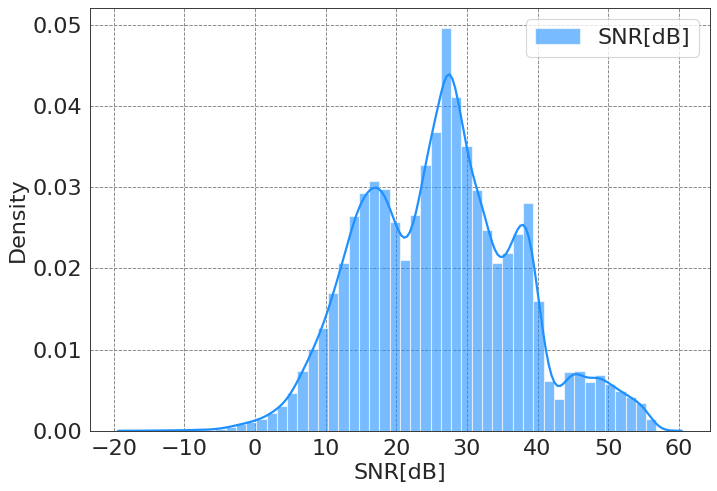

In [12]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df["SNR[dB]"], color="dodgerblue", label="SNR[dB]", **kwargs)
plt.ylabel("Density")
plt.grid(color="gray" , linestyle="--")
plt.legend()


# def show_density(columns):
#   for i in columns:
#     plt.figure(figsize=(10,7), dpi= 80)
#     sns.distplot(df[str(i)], color="dodgerblue", label=str(i), **kwargs, kde=False)
#     # plt.hist(df[str(i)], label=str(i))
#     plt.ylabel("Density")
#     plt.grid(color="gray" , linestyle="--")
#     plt.legend()
# show_density(df.columns)

In [13]:
df["ChannelState"].value_counts(normalize = True)

LOS     0.56
NLOSv   0.44
Name: ChannelState, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


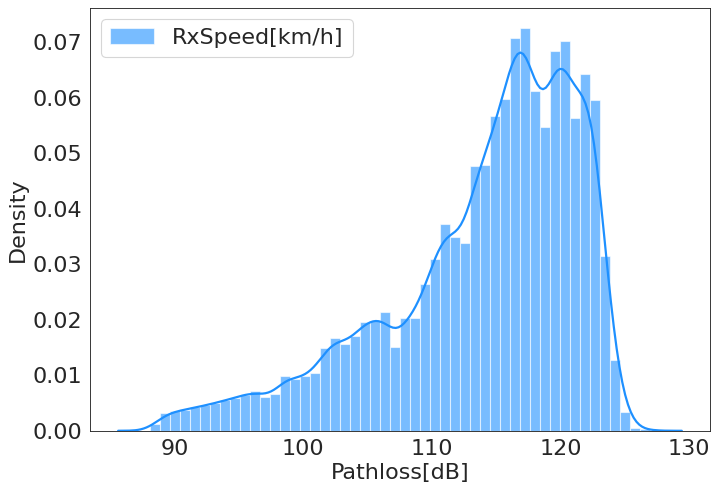

In [14]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df["Pathloss[dB]"], color="dodgerblue", label="RxSpeed[km/h]", **kwargs)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


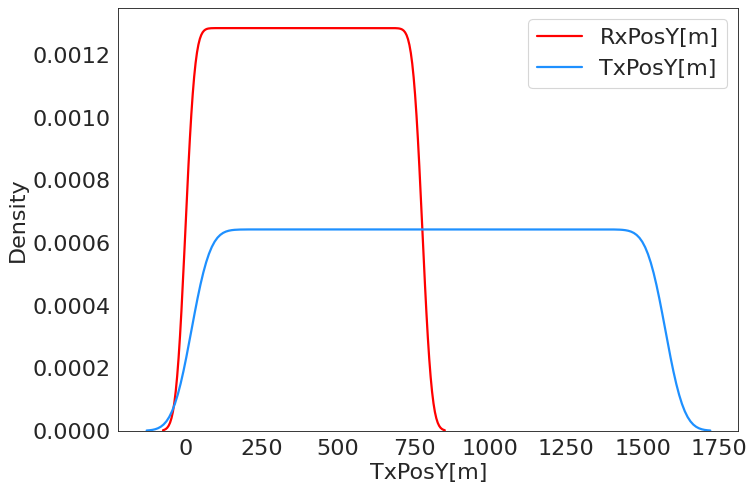

In [15]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df["RxPosY[m]"], color="red", label="RxPosY[m]", **kwargs, hist = False)
sns.distplot(df["TxPosY[m]"], color="dodgerblue", label="TxPosY[m]", **kwargs, hist = False)
plt.legend()

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["ChannelState"].unique())
df["ChannelState"] = le.transform(df["ChannelState"])
df.reset_index(inplace = True)
df

,index,TxPosX[m],TxPosY[m],RxPosX[m],RxPosY[m],ChannelState,SNR[dB],Pathloss[dB],Frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h]
0,0,300,20.00,300,0.00,0,56.30,88.08,30.40,20.00,140.00,70.00
1,1,300,20.39,300,0.19,0,56.29,88.16,30.40,20.19,140.00,70.00
2,2,300,20.78,300,0.39,0,56.32,88.25,30.40,20.39,140.00,70.00
3,3,300,21.17,300,0.58,0,56.06,88.33,30.40,20.58,140.00,70.00
4,4,300,21.56,300,0.78,0,56.06,88.41,30.40,20.78,139.97,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...
63980,63995,300,1573.61,300,776.81,0,23.82,121.03,33.89,796.80,140.40,69.84
63981,63996,300,1574.00,300,777.00,0,22.71,121.03,33.89,797.00,140.40,69.84
63982,63997,300,1574.39,300,777.19,0,23.21,121.03,33.89,797.20,140.40,70.20
63983,63998,300,1574.78,300,777.39,0,23.18,121.03,33.89,797.39,140.40,69.84


In [17]:
df.drop(columns = ["index", "RxPosX[m]", "TxPosX[m]"], inplace = True)
df.tail(10)

,TxPosY[m],RxPosY[m],ChannelState,SNR[dB],Pathloss[dB],Frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h]
63975,1571.67,775.83,1,12.12,124.45,33.89,795.84,140.40,70.20
63976,1572.06,776.03,1,15.10,123.42,33.89,796.03,136.80,69.84
63977,1572.44,776.22,1,9.63,125.30,33.89,796.22,140.40,70.20
63978,1572.83,776.42,0,22.05,121.02,33.89,796.41,140.40,69.84
63979,1573.22,776.61,0,23.06,121.03,33.89,796.61,140.40,70.20
63980,1573.61,776.81,0,23.82,121.03,33.89,796.80,140.40,69.84
63981,1574.00,777.00,0,22.71,121.03,33.89,797.00,140.40,69.84
63982,1574.39,777.19,0,23.21,121.03,33.89,797.20,140.40,70.20
63983,1574.78,777.39,0,23.18,121.03,33.89,797.39,140.40,69.84
63984,1575.17,777.58,0,23.63,121.04,33.89,797.59,140.40,69.84


In [18]:
import sklearn
scaler_in = sklearn.preprocessing.StandardScaler()
scaler_in.fit(df.drop(columns = ["SNR[dB]", "Pathloss[dB]", "ChannelState"]))
data = pd.DataFrame(scaler_in.transform(df.drop(columns = ["SNR[dB]", "Pathloss[dB]", "ChannelState"])))
def reset_data(data, target):
  co = list(data.columns)
  # co.remove(["SNR[dB]", "Pathloss[dB]", "frequency[Ghz]"])
  co.remove("SNR[dB]")
  co.remove("Pathloss[dB]")
  co.remove("ChannelState")
  print(co)
  for i, c in enumerate(co):
    target.rename(columns = {i: c}, inplace = True)
reset_data(df, data)
data["ChannelState"] = df["ChannelState"]
data = data.fillna(0)
data = data.astype({"ChannelState": int})
data.tail(10)

['TxPosY[m]', 'RxPosY[m]', 'Frequency[Ghz]', 'distance[m]', 'TxSpeed[km/h]', 'RxSpeed[km/h]']


,TxPosY[m],RxPosY[m],Frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h],ChannelState
63975,1.72,1.72,1.62,1.72,0.58,1.20,1
63976,1.73,1.73,1.62,1.73,-4.62,-0.96,1
63977,1.73,1.73,1.62,1.73,0.58,1.20,1
63978,1.73,1.73,1.62,1.73,0.58,-0.96,0
63979,1.73,1.73,1.62,1.73,0.58,1.20,0
63980,1.73,1.73,1.62,1.73,0.58,-0.96,0
63981,1.73,1.73,1.62,1.73,0.58,-0.96,0
63982,1.73,1.73,1.62,1.73,0.58,1.20,0
63983,1.73,1.73,1.62,1.73,0.58,-0.96,0
63984,1.73,1.73,1.62,1.73,0.58,-0.96,0


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 data, df["SNR[dB]"], test_size=0.1, random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_test

,TxPosY[m],RxPosY[m],Frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h],ChannelState
53532,-0.39,-0.39,1.22,-0.39,0.06,-0.96,0
30520,0.46,0.46,0.01,0.46,0.58,1.20,0
144,-1.61,-1.61,-1.77,-1.61,0.01,-0.10,0
34999,0.87,0.87,0.33,0.87,0.58,1.20,0
30390,0.34,0.34,0.01,0.34,0.06,1.20,0
...,...,...,...,...,...,...,...
42128,0.12,0.12,0.71,0.12,0.06,1.20,0
59210,1.06,1.06,1.41,1.06,0.58,-0.96,1
62456,0.41,0.41,1.62,0.41,0.06,1.20,0
47337,1.17,1.17,0.84,1.17,0.58,-0.96,1


In [20]:
import time
durations = {}

In [21]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes = (30, 20, 20), random_state = 42, max_iter = 300, activation = "tanh")
start = time.time()
clf.fit(X_train, y_train)
durations["MLP"] = time.time() - start

In [22]:
clf.score(X_test, y_test)

0.9033533430392827

In [23]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
start = time.time()
RF.fit(X_train, y_train)
durations["RF"] = time.time() - start

In [24]:
RF.score(X_test, y_test)

0.893593720140626

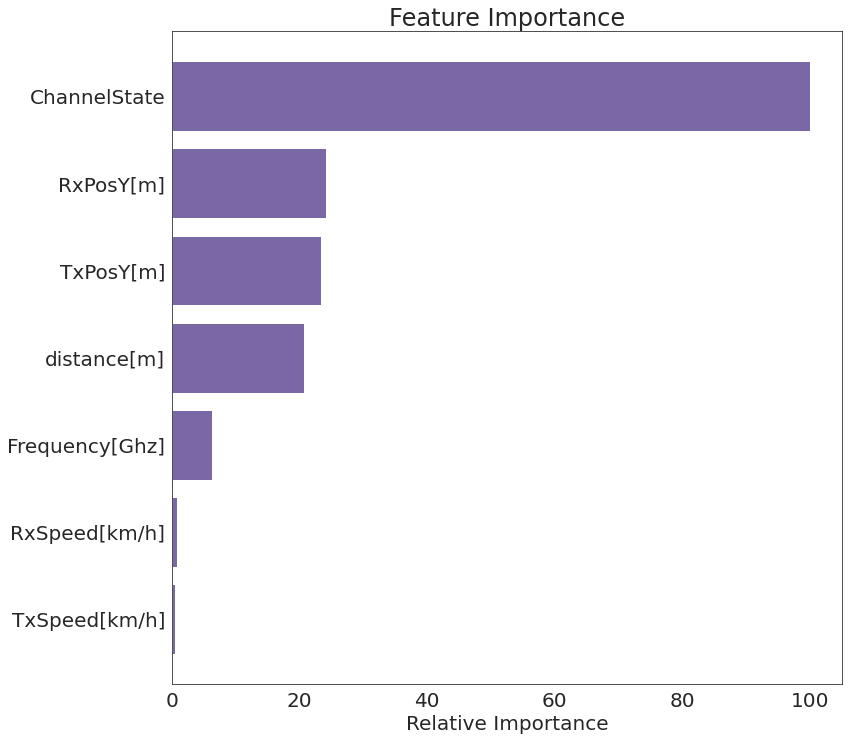

In [25]:
def showFeatureImportance(model):
    #FEATURE IMPORTANCE
    # Get Feature Importance from the classifier
    feature_importance = model.feature_importances_

    # Normalize The Features
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    #plot relative feature importance
    plt.figure(figsize=(12, 12))
    plt.barh(pos, feature_importance[sorted_idx], align='center', color='#7A68A6')
    plt.yticks(pos, np.asanyarray(X_train.columns)[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Feature Importance')
    plt.show()
showFeatureImportance(RF)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


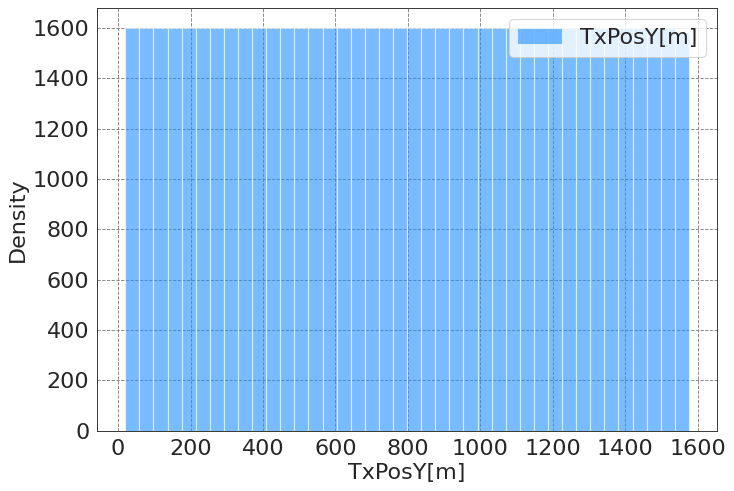

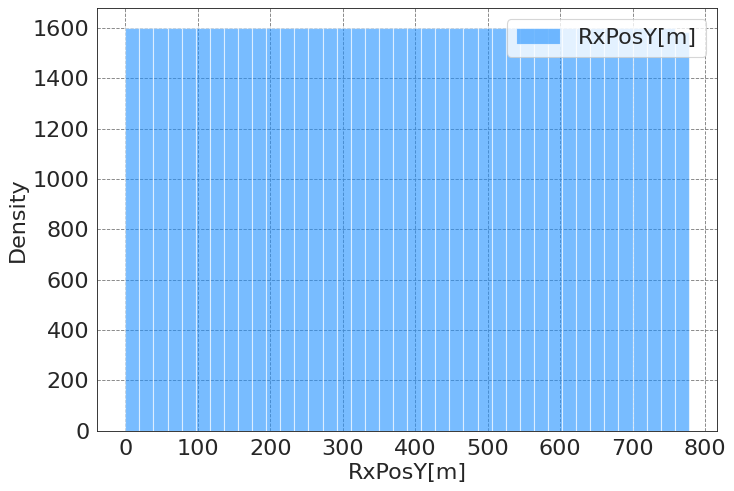

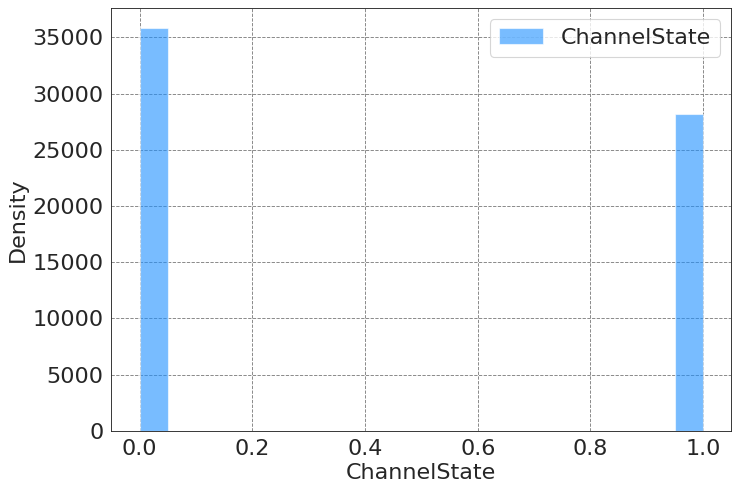

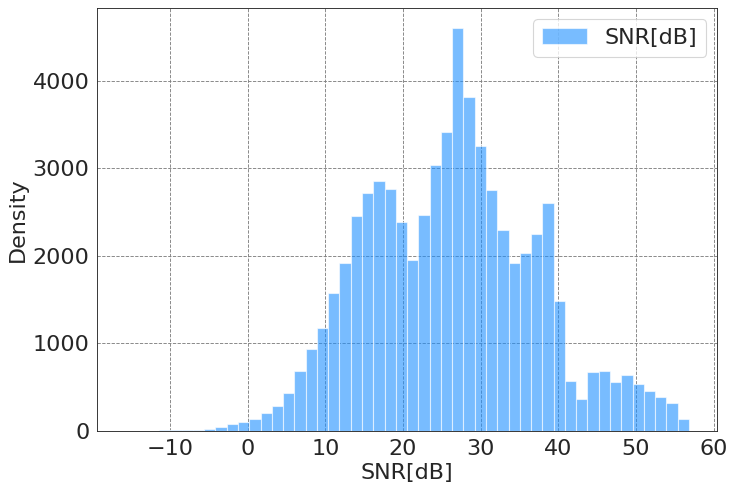

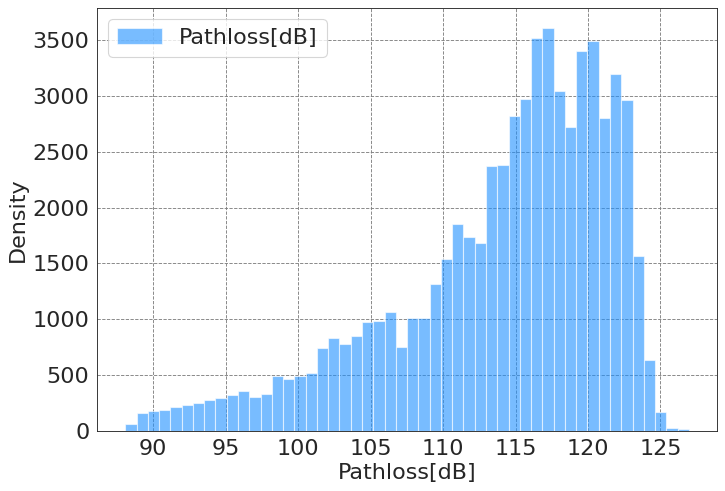

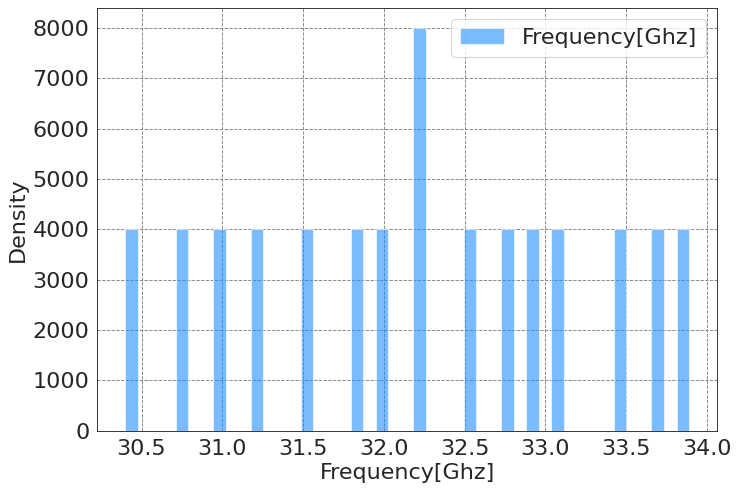

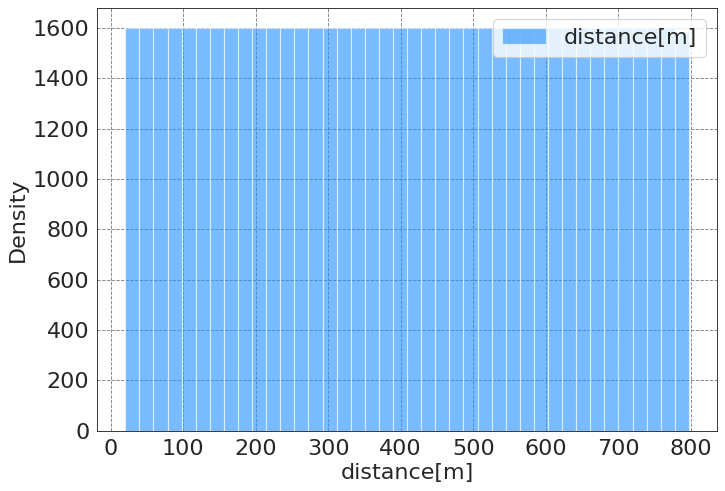

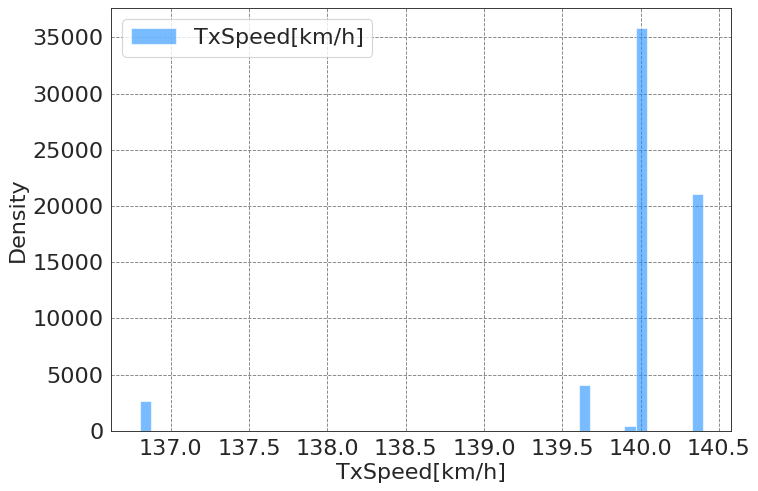

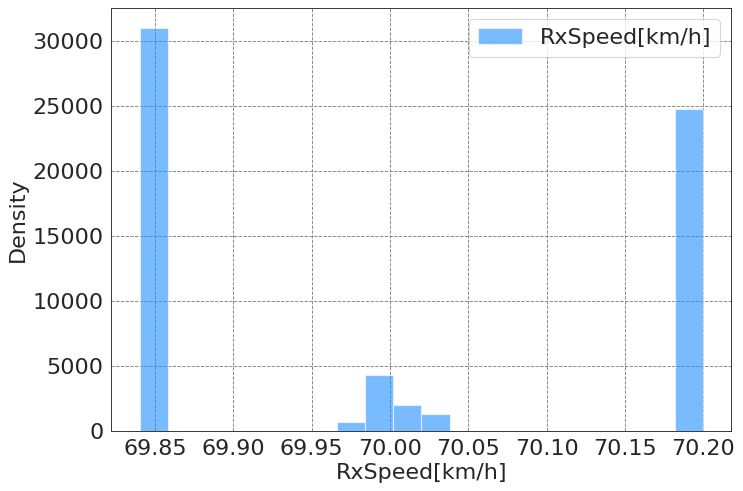

In [30]:
def show_density(columns):
  for j, i in enumerate(columns):
    plt.figure(figsize=(10,7), dpi= 80)
    sns.distplot(df[str(i)], color="dodgerblue", label=str(i), **kwargs, kde=False)
    # plt.hist(df[str(i)], label=str(i))
    plt.ylabel("Density")
    plt.grid(color="gray" , linestyle="--")
    plt.legend()
    plt.savefig("/gdrive/MyDrive/Colab Notebooks/Parvin/highway/plot/" + str(j) + ".png")
show_density(df.columns)

In [31]:
from sklearn.neighbors import KNeighborsRegressor

max = 0
n = 0
start = time.time()
for i in range(2, 20):
  KNN = KNeighborsRegressor(n_neighbors = i, metric="cosine")
  KNN.fit(X_train, y_train)
  a = KNN.score(X_test, y_test)
  if a > max:
    max = a
    n = i
    print(str(i))
durations["KNN"] = time.time() - start
print(str(max) + " " + str(n))

2
3
4
5
6
7
8
9
10
11
12
13
0.9028439397389697 13


In [32]:
KNN = KNeighborsRegressor(n_neighbors=13, metric="cosine")
start = time.time()
KNN.fit(X_train, y_train)
durations["KNN"] = time.time() - start

In [33]:
KNN.score(X_test, y_test)

0.9028439397389697

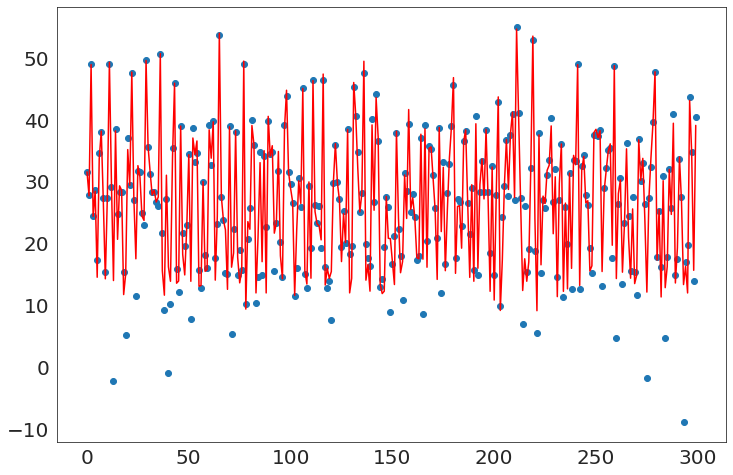

In [34]:
tt = X_test[:300].reset_index(drop = True)
tt["SNR[dB]"] = pd.DataFrame(y_test[:300]).reset_index(drop = True)["SNR[dB]"]
plt.figure(figsize = (12, 8))
plt.scatter(tt.index, y_test[:300])
plt.plot(tt.index, KNN.predict(tt.drop(columns = ["SNR[dB]"])), color = "r")

In [35]:
tt.sort_values(by = 'SNR[dB]', ascending = True, inplace = True)
tt.reset_index(drop = True, inplace = True)

In [36]:
tt.drop(tt[tt["SNR[dB]"] < 15].index, inplace=True)
tt.reset_index(drop=True, inplace=True)

In [37]:
tt.describe()

,TxPosY[m],RxPosY[m],Frequency[Ghz],distance[m],TxSpeed[km/h],RxSpeed[km/h],ChannelState,SNR[dB]
count,256.00,256.00,256.00,256.00,256.00,256.00,256.00,256.00
mean,-0.18,-0.18,0.03,-0.18,0.04,0.08,0.30,29.67
std,0.99,0.99,1.01,0.99,0.84,0.98,0.46,9.23
min,-1.71,-1.71,-1.77,-1.71,-4.62,-0.96,0.00,15.01
25%,-1.01,-1.01,-0.69,-1.01,0.06,-0.96,0.00,22.94
50%,-0.33,-0.33,0.01,-0.33,0.06,-0.10,0.00,28.41
75%,0.67,0.67,0.71,0.67,0.58,1.20,1.00,36.13
max,1.68,1.68,1.62,1.68,0.58,1.20,1.00,55.04


In [38]:
def show_model_performances(models, tt):
  test_durations = {}
  for i in models.keys():
    plt.figure(figsize = (12, 8))
    plt.scatter(tt.index, tt["SNR[dB]"], label = "Real data")
    start = time.time()
    plt.plot(tt.index, i.predict(tt.drop(columns = ["SNR[dB]"])), color = "r", label=models[i])
    plt.xlabel("Index")
    plt.ylabel("SNR[dB]")
    test_durations[models[i]] = time.time() - start
    plt.title(models[i])
    plt.grid(color="gray" , linestyle="--")
    plt.legend()
    plt.savefig("/gdrive/MyDrive/Colab Notebooks/Parvin/highway/" + str(models[i]) + ".png")
  print("All in one graph comparison:")
  plt.figure(figsize = (16, 12))
  plt.scatter(tt.index, tt["SNR[dB]"], label = "Real data")
  c = ["r", "g", "b"]
  for i, m in enumerate(models.keys()):
    plt.plot(tt.index, m.predict(tt.drop(columns = ["SNR[dB]"])), color = c[i], label = models[m])
  plt.xlabel("index")
  plt.ylabel("SNR[dB]")
  plt.grid(color="gray", linestyle="--")
  plt.legend()
  plt.savefig("/gdrive/MyDrive/Colab Notebooks/Parvin/highway/3.png")
  return test_durations

All in one graph comparison:
Train time: {'MLP': 56.40137839317322, 'RF': 21.021336793899536, 'KNN': 0.006415128707885742}
Test time: {'KNN': 0.4203829765319824, 'Neural Network': 0.004398345947265625, 'Random Forrest': 0.04939150810241699}


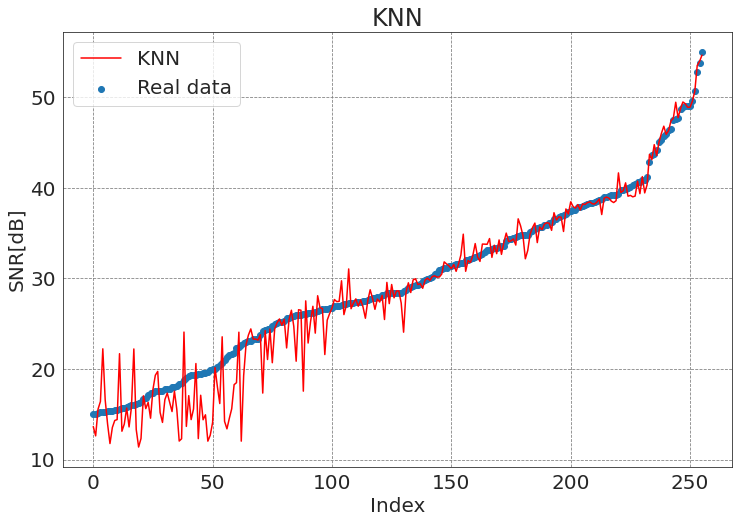

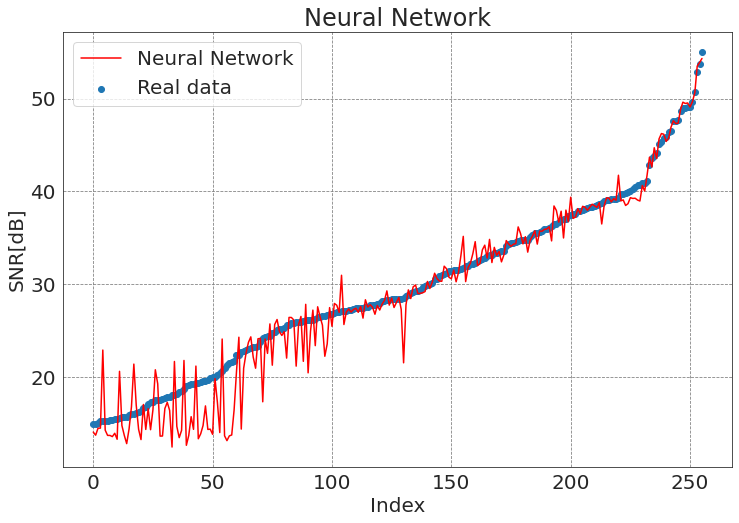

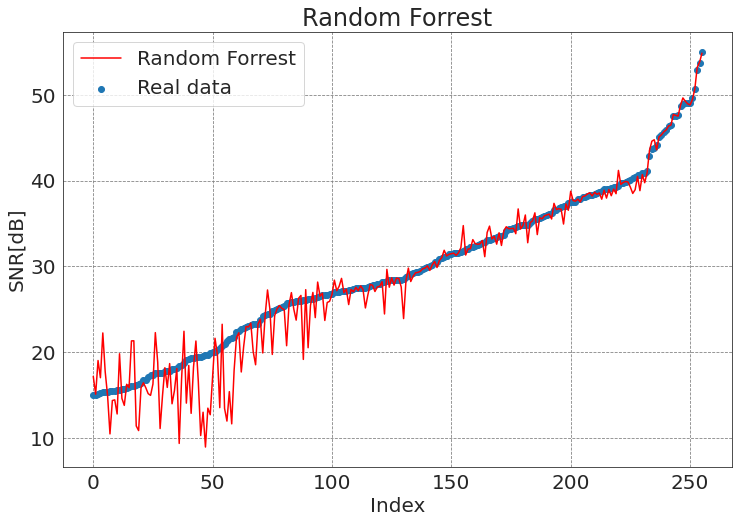

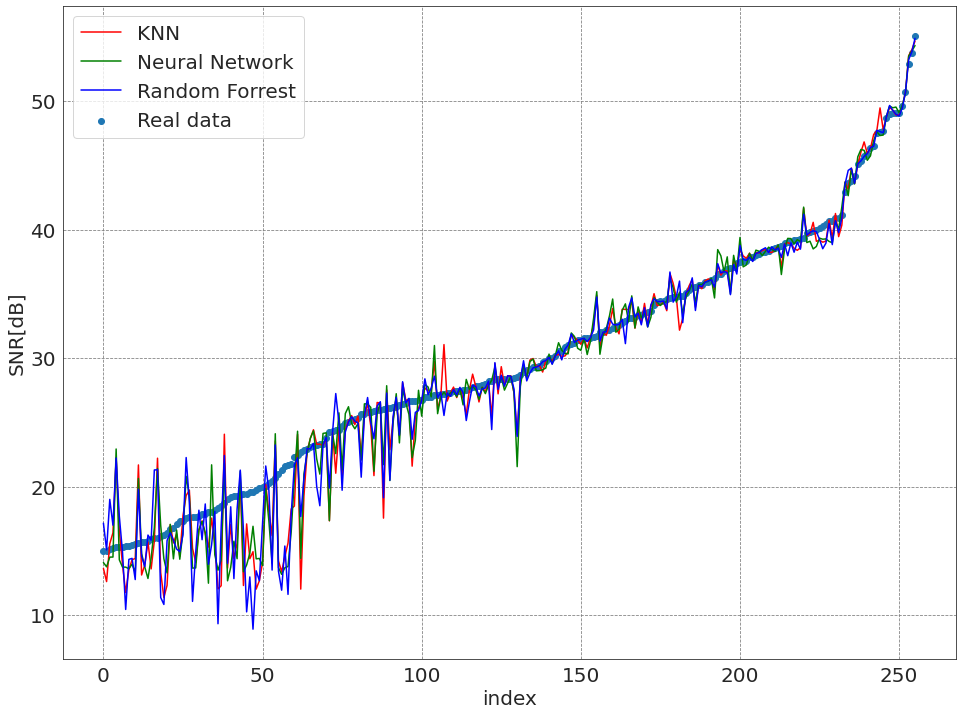

In [39]:
models = {KNN: "KNN", clf: "Neural Network", RF: "Random Forrest"}
test_durations = show_model_performances(models, tt)
print("Train time: " + str(durations) + "\nTest time: " + str(test_durations))

In [40]:
df[df["SNR[dB]"] > 25]["ChannelState"].value_counts()

0    32508
1     2899
Name: ChannelState, dtype: int64

In [41]:
le.transform(["LOS"])

array([0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


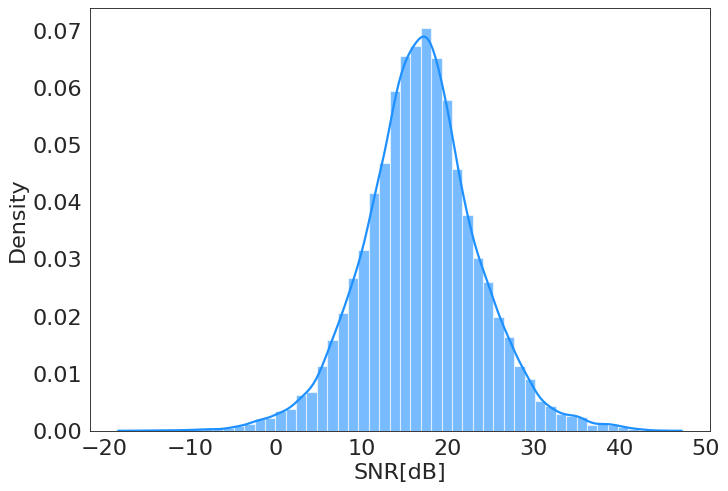

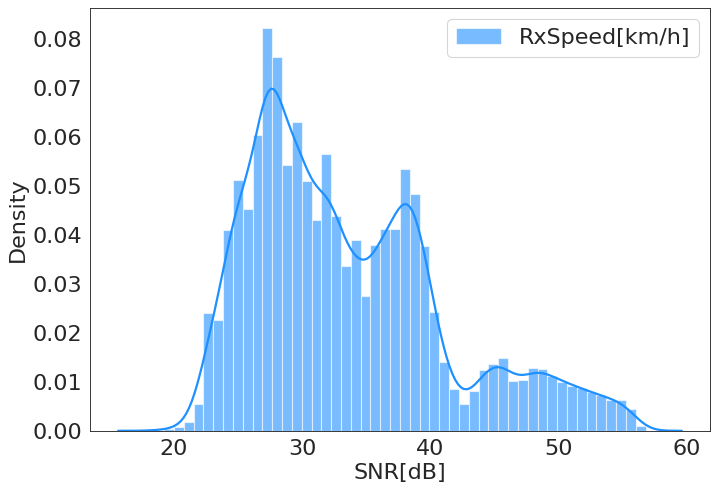

In [42]:
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df[df["ChannelState"] == 1]["SNR[dB]"], color="dodgerblue", label="RxSpeed[km/h]", **kwargs)

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df[df["ChannelState"] == 0]["SNR[dB]"], color="dodgerblue", label="RxSpeed[km/h]", **kwargs)
plt.legend()

In [43]:
from sklearn.neighbors import DistanceMetric
DistanceMetric.get_metric('mahalanobis', V=np.cov(tt.drop(columns = ["SNR[dB]"])))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  category=FutureWarning,


In [44]:
test_knn = KNeighborsRegressor(n_neighbors=5, metric="manhattan")
test_knn.fit(X_train, y_train)

KNeighborsRegressor(metric='manhattan')

In [45]:
test_knn.score(X_test, y_test)

0.8954532426605172